In [1]:
import numpy as np
import pandas as pd
#import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
import matplotlib.image as mpimg
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df=pd.read_csv("FutbolMatches.csv")
df=df.iloc[:,1:]

In [3]:
x=df.iloc[:,[6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23,24,25,28,29,30,31,32,33,35,36,37,38,39,40,41,42,43,44,45,46]]
y=df.iloc[:,[34]]
x

,strong_overall,weak_overall,strong_attack,weak_attack,strong_midfield,weak_midfield,strong_deffense,weak_deffense,strong_bu_speed,weak_bu_speed,...,dif_midfield,dif_deffense,dif_bu_speed,dif_bu_passing,dif_cc_crossing,dif_cc_passing,dif_cc_shooting,dif_aggression,dif_preassure,dif_avg_age
0,84,75,83,72,81,74,82,73,70,70,...,7,9,0,-40,-10,0,0,-35,0,-0.73
1,75,73,72,71,72,67,74,70,50,70,...,5,4,-20,-20,-15,-15,-15,-20,-5,3.03
2,78,76,77,73,74,75,73,74,70,65,...,-1,-1,5,-20,-25,5,-5,-15,0,2.04
3,85,83,83,82,83,82,82,82,65,70,...,1,0,-5,-10,-5,0,35,-15,5,-1.00
4,83,82,83,81,81,79,78,79,70,70,...,2,-1,0,-32,23,11,0,-16,-28,1.53
5,80,72,79,69,77,72,76,66,70,70,...,5,10,0,-35,5,20,0,-10,10,-1.21
6,83,76,83,73,81,73,80,74,67,70,...,8,6,-3,-40,15,-15,-30,-30,-40,1.17
7,77,62,73,60,74,57,74,58,65,70,...,17,16,-5,-25,-15,-5,-5,-10,-5,0.23
8,80,74,81,72,80,71,76,70,50,70,...,9,6,-20,-15,25,40,26,10,-35,1.00
9,73,72,70,69,70,68,68,67,70,70,...,2,1,0,0,0,10,0,0,0,0.66


In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=31)
result_df = pd.DataFrame(index=X_test.index, columns=['Random','Naive_Mean','LR','Actual'])
result_df.Actual = y_test

result_df.Naive_Mean = y_train.mean()

result_df.Random = np.random.uniform(y_train.min(), y_train.max(),y_test.shape)

car_lm = LinearRegression()
car_lm.fit(X_train, y_train)
result_df.LR =car_lm.predict(X_test)


result_df['|Random-Actual|'] = abs(result_df.Random-result_df.Actual)
result_df['|Naive_Mean-Actual|'] = abs(result_df.Naive_Mean-result_df.Actual)
result_df['|LR-Actual|'] = abs(result_df.LR-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|']]

In [5]:
X_train=StandardScaler().fit_transform(X_train) 
X_test=StandardScaler().fit(X_train).transform(X_test)

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\ritik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [6]:
clf=LogisticRegression().fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5805626598465473

In [7]:
clf1 = GaussianNB()
clf1.fit(X_train, y_train)
clf1.score(X_test,y_test)

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.45268542199488493

In [8]:
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
clf2.score(X_test, y_test)

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5063938618925832

C:\Users\ritik\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: Fut

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: Fut

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: Fut

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: Fut

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: Fut

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ritik\Anaconda3\li

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: Fut

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: Fut

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils

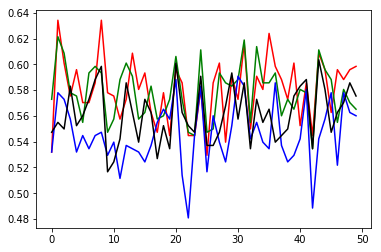

In [9]:
import matplotlib.pyplot as plt
ax=plt.axis()
plt.subplot(1,1,1)
lii=[]
li=[]
li1=[]
li2=[]
li3=[]
for i in range(50):
    lii.append(i)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    clf=LogisticRegression().fit(X_train,y_train)
    li.append(clf.score(X_test,y_test))
    clf1 = GaussianNB()
    clf1.fit(X_train, y_train)
    li1.append(clf1.score(X_test,y_test))
    clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
    li2.append(clf2.score(X_test, y_test))
    clf3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf3.fit(X_train, y_train)
    li3.append(clf3.score(X_test,y_test))

plt.plot(lii,li,c="r")
plt.plot(lii,li1,c="g")
plt.plot(lii,li2,c="b")
plt.plot(lii,li3,c="black")


C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


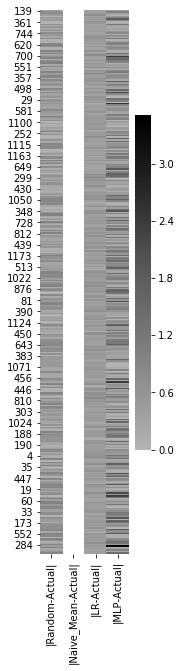

In [10]:

f_mlp = MLPRegressor(hidden_layer_sizes=5,max_iter=2000)
f_mlp.fit(X_train, y_train)

result_df['MLP'] = f_mlp.predict(X_test)
result_df['|MLP-Actual|'] = abs(result_df.MLP-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [11]:
metric_df = pd.DataFrame(index = ['ME','RMSE', 'MAE','MAPE'] ,
                         columns = ['Random','Naive_Mean','LR'])

n_test = len(result_df)

for m in metric_df.columns:
    metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
    metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
    metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
    metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100
metric_df

C:\Users\ritik\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Random,Naive_Mean,LR
ME,0.04975,0,0.0390828
RMSE,0.582799,0,0.485283
MAE,0.500888,0,0.46625
MAPE,inf,0,inf


In [12]:

m='MLP'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

C:\Users\ritik\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


,Random,Naive_Mean,LR,MLP
ME,0.04975,0,0.0390828,-0.165931
RMSE,0.582799,0,0.485283,0.899327
MAE,0.500888,0,0.46625,0.715577
MAPE,inf,0,inf,inf


In [13]:

X_train_s, X_tune, y_train_s, y_tune = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)

print('X_train_s Shape: ', X_train_s.shape)
print('X_tune Shape: ', X_tune.shape)
print('y_train_s Shape: ', y_train_s.shape)
print('y_tune Shape: ', y_tune.shape)

X_train Shape:  (792, 36)
y_train Shape:  (792, 1)
X_train_s Shape:  (633, 36)
X_tune Shape:  (159, 36)
y_train_s Shape:  (633, 1)
y_tune Shape:  (159, 1)


In [14]:
num_repetition = 5

In [15]:
activation_options = ['identity', 'logistic', 'tanh', 'relu']
solver_options = ['lbfgs','sgd','adam']

my_index = pd.MultiIndex.from_product([activation_options,solver_options],
                                     names=('activation', 'solver'))

tune_df = pd.DataFrame(index = my_index,
                       columns=['R{}'.format(i) for i in range(num_repetition)])

tune_df

R0   R1   R2   R3   R4
activation solver                         
identity   lbfgs   NaN  NaN  NaN  NaN  NaN
           sgd     NaN  NaN  NaN  NaN  NaN
           adam    NaN  NaN  NaN  NaN  NaN
logistic   lbfgs   NaN  NaN  NaN  NaN  NaN
           sgd     NaN  NaN  NaN  NaN  NaN
           adam    NaN  NaN  NaN  NaN  NaN
tanh       lbfgs   NaN  NaN  NaN  NaN  NaN
           sgd     NaN  NaN  NaN  NaN  NaN
           adam    NaN  NaN  NaN  NaN  NaN
relu       lbfgs   NaN  NaN  NaN  NaN  NaN
           sgd     NaN  NaN  NaN  NaN  NaN
           adam    NaN  NaN  NaN  NaN  NaN

In [16]:
n = len(y_tune)
for activation_o in activation_options:
    for solver_o in solver_options:
        for rep in tune_df.columns:
            f_mlp = MLPRegressor(hidden_layer_sizes=(5), max_iter=2000,
                                   activation=activation_o,solver=solver_o)

            f_mlp.fit(X_train_s, y_train_s)
            y_tune_predict = f_mlp.predict(X_tune)
            RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
            
            tune_df.at[(activation_o,solver_o),rep] = RSME

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unable to coerce to Series, length must be 1: given 159